# 📘 Regression Analysis: The Complete Reference Guide

## 1. What is Regression?
Regression is a supervised learning technique used to predict **continuous values** (numbers like Price, Temperature, Speed).

### 🔹 Types of Regression
* **Simple Linear Regression:** Predicting a target ($y$) using **one** feature ($x$).
    * *Formula:* $$y = b_0 + b_1x$$
    * *Analogy:* Guessing a person's weight based ONLY on their height.
* **Multiple Linear Regression:** Predicting a target ($y$) using **multiple** features ($x_1, x_2, ...$).
    * *Formula:* $$y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$$
    * *Analogy:* Guessing weight based on height, diet, gym hours, and genetics.

---

## 2. The Machine Learning Pipeline
Before training, we must prepare the data to ensure the model learns correctly.

1.  **Train / Test Split:**
    * We hide 20-30% of data (Test Set) to simulate "Future Data."
    * *Goal:* Prevent the model from memorizing the answers.
2.  **Feature Scaling (Standardization):**
    * We scale features so they share the same range (e.g., -1 to 1).
    * *Why:* Without this, large numbers (Salary: 100,000) will dominate small numbers (Age: 30).

---

## 3. Evaluation Metrics (The Report Card)
How do we know if the model is good? We measure **Success** and **Error**.

### ✅ The "Success" Scores ($R^2$)
This measures "Goodness of Fit" (0.0 to 1.0).

| Metric | Definition | When to use? |
| :--- | :--- | :--- |
| **$R^2$ Score** | The % of variance explained by the model. | [cite_start]Use for simple models. [cite: 74] |
| **Adjusted $R^2$** | A stricter score that **penalizes** useless features. | [cite_start]Use for Multiple Regression to prevent cheating. [cite: 89, 91] |

### ❌ The "Error" Scores (Loss Functions)
We want these to be as close to **0** as possible.

| Metric | Formula | Pros & Cons | Real World Analogy |
| :--- | :--- | :--- | :--- |
| **MAE** | $$\frac{1}{n}\sum|y - \hat{y}|$$ | **Pros:** Robust to Outliers.<br>**Cons:** Harder for math (derivatives). | [cite_start]**"The Fair Boss"**<br>Late 5 min = Fine $5. [cite: 127, 131] |
| **MSE** | $$\frac{1}{n}\sum(y - \hat{y})^2$$ | **Pros:** Great for training.<br>**Cons:** Sensitive to Outliers. Units are squared ($^2$). | [cite_start]**"The Angry Boss"**<br>Late 5 min = Fine $25. [cite: 117, 124] |
| **RMSE** | $$\sqrt{MSE}$$ | **Pros:** Readable units (same as target).<br>**Cons:** Still sensitive to outliers. | [cite_start]**"The Translator"**<br>Translates the fine back to normal dollars. [cite: 135, 139] |

---

## 4. Model Diagnosis: Overfitting vs. Underfitting
We diagnose the model by comparing **Training Score** vs. **Test Score**.

### 🔴 Scenario A: Underfitting (High Bias)
* **Definition:** The model is too simple (Lazy). [cite_start]It captures neither the trend nor the noise[cite: 30].
* **Symptoms:** Low Train Score ❌ / Low Test Score ❌.
* **Fix:** Add more features, make the model more complex.

### 🔴 Scenario B: Overfitting (High Variance)
* [cite_start]**Definition:** The model **memorizes** the training data (including noise) but fails on new data[cite: 10].
* **Symptoms:** High Train Score ✅ / Low Test Score ❌.
* **Fix:** Get more data, remove features, or use Regularization (Ridge/Lasso).

### 🟢 Scenario C: Generalized (Balanced)
* [cite_start]**Definition:** The model learns the true pattern[cite: 48].
* **Symptoms:** High Train Score ✅ / High Test Score ✅.

---

### 💡 Summary Cheat Sheet
> * **Metric for Business:** Use **RMSE** or **MAE** to explain error in real currency.
> * **Metric for Training:** Use **MSE** for better optimization.
> * **Feature Selection:** Always check **Adjusted $R^2$** to see if a new column is actually useful.
> * **Diagnosis:** If Train is 99% and Test is 60%, you are **Overfitting**.

✅ Step 1: Data Created. Here are the first 5 rows:
   Size_m2  Rooms  Age          Price
0      152      5    0  379360.837485
1      229      5    4  556904.535543
2      142      5    8  380719.995134
3       64      3   16  196653.527158
4      156      4    8  384397.548204
--------------------------------------------------
✅ Step 2: Data Split.
Training Samples: 400
Test Samples: 100
--------------------------------------------------
✅ Step 3: Data Scaled (Mean=0, Std=1)
--------------------------------------------------
✅ Step 4: Model Trained.
Intercept (Base Price): $376129.97
Coefficients (Weights): [115064.76301878  14663.95307019  -7486.56405531]
--------------------------------------------------
✅ Step 5: Report Card (Evaluation)
Model Grade (R2 Score): 0.9639 (99% is perfect)
Average Error (MAE):    $16514.70
Root Sq Error (RMSE):   $20932.18
--------------------------------------------------
✅ Step 6: Diagnosis
Training Score: 0.9673
Test Score:     0.9639
🎉 SUCCESS: The 

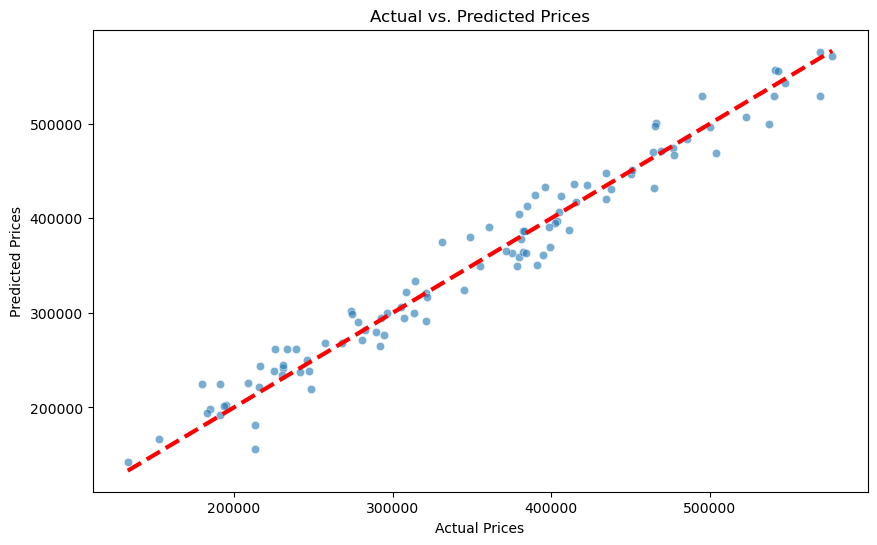

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==========================================
# STEP 1: CREATE A DATASET (Simulation)
# ==========================================
# Imagine we scraped this data from a Real Estate website.
# Features: Size (m2), Room Count, Building Age
# Target: Price ($)

np.random.seed(42) # Ensure we get the same random numbers every time
data_size = 500

# Create random data
size = np.random.randint(50, 250, data_size)  # 50 to 250 m2
rooms = np.random.randint(1, 6, data_size)    # 1 to 5 rooms
age = np.random.randint(0, 30, data_size)     # 0 to 30 years old

# Create a formula for Price (y = m1*x1 + m2*x2 ... + noise)
# Logic: Base $50k + $2k per m2 + $10k per room - $1k per year of age
price = 50000 + (2000 * size) + (10000 * rooms) - (1000 * age) + np.random.normal(0, 20000, data_size)

# Put it in a DataFrame
df = pd.DataFrame({
    'Size_m2': size,
    'Rooms': rooms,
    'Age': age,
    'Price': price
})

print("✅ Step 1: Data Created. Here are the first 5 rows:")
print(df.head())
print("-" * 50)

# ==========================================
# STEP 2: SPLIT THE DATA
# ==========================================
X = df[['Size_m2', 'Rooms', 'Age']] # Features (Matrix)
y = df['Price']                     # Target (Vector)

# We hide 20% of data for the "Exam" (Test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Step 2: Data Split.")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")
print("-" * 50)

# ==========================================
# STEP 3: FEATURE SCALING (Standardization)
# ==========================================
# Crucial: Size is 200, Rooms is 3. We must scale them to the same range.
scaler = StandardScaler()

# FIT on Train, TRANSFORM on Train and Test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Step 3: Data Scaled (Mean=0, Std=1)")
print("-" * 50)

# ==========================================
# STEP 4: TRAIN THE MODEL
# ==========================================
model = LinearRegression()
model.fit(X_train_scaled, y_train) # The Learning happens here

print("✅ Step 4: Model Trained.")
print(f"Intercept (Base Price): ${model.intercept_:.2f}")
print(f"Coefficients (Weights): {model.coef_}")
print("-" * 50)

# ==========================================
# STEP 5: PREDICT & EVALUATE
# ==========================================
# We predict on BOTH sets to check for Overfitting later
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("✅ Step 5: Report Card (Evaluation)")
print(f"Model Grade (R2 Score): {r2_test:.4f} (99% is perfect)")
print(f"Average Error (MAE):    ${mae:.2f}")
print(f"Root Sq Error (RMSE):   ${rmse:.2f}")
print("-" * 50)

# ==========================================
# STEP 6: OVERFITTING CHECK
# ==========================================
print("✅ Step 6: Diagnosis")
print(f"Training Score: {r2_train:.4f}")
print(f"Test Score:     {r2_test:.4f}")

if r2_train > 0.95 and r2_test < 0.70:
    print("⚠️ WARNING: Overfitting detected! (High Variance)")
elif r2_train < 0.60:
    print("⚠️ WARNING: Underfitting detected! (High Bias)")
else:
    print("🎉 SUCCESS: The model is Generalized (Balanced).")

# ==========================================
# STEP 7: VISUALIZATION
# ==========================================
plt.figure(figsize=(10, 6))
# Scatter plot of Real vs Predicted
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
# Draw a perfect red line (Ideal scenario)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# 📉 Regresyon Performans Metrikleri: Model Başarısını Ölçme

Bir regresyon modelini eğittikten sonra, modelin ne kadar iyi performans gösterdiğini anlamak için belirli metrikler kullanırız. Bu metrikler bize modelin "başarısını" ve "hatasını" gösterir.

---

## 1. Başarı Puanı: $R^2$ ve Düzeltilmiş $R^2$
Bu metrikler, modelin veriyi ne kadar iyi açıkladığını (uyum iyiliğini) ölçer.

### 🔹 $R^2$ (R-Kare / Coefficient of Determination)
* [cite_start]**Tanım:** Modelin, verideki değişimin (varyansın) ne kadarını açıkladığını gösterir[cite: 74].
* **Formül:**
  $$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
  * [cite_start]*$SS_{res}$*: Hata kareler toplamı (Gerçek değer ile tahmin arasındaki fark)[cite: 78].
  * [cite_start]*$SS_{tot}$*: Toplam varyans (Gerçek değerlerin ortalamadan farkı)[cite: 79].
* [cite_start]**Tuzak:** Modele her yeni değişken eklendiğinde, bu değişken anlamsız olsa bile $R^2$ artma eğilimindedir[cite: 89]. [cite_start]Bu durum yanıltıcı olabilir[cite: 90].

### 🔹 Düzeltilmiş $R^2$ (Adjusted $R^2$)
* [cite_start]**Amaç:** Gereksiz değişken eklenmesini engellemek ve modelin karmaşıklığını cezalandırmaktır[cite: 91].
* **Formül:**
  $$R_{adj}^2 = 1 - (1-R^2) \frac{n-1}{n-p-1}$$
  * [cite_start]*$n$*: Veri sayısı (gözlem)[cite: 94].
  * [cite_start]*$p$*: Bağımsız değişken sayısı[cite: 95].
* [cite_start]**Yorum:** Eğer modele eklenen yeni değişken gerçekten işe yarıyorsa bu değer artar, yaramıyorsa düşer[cite: 101]. [cite_start]Çok değişkenli modellerde $R^2$ yerine buna bakılmalıdır[cite: 108].

---

## 2. Hata Metrikleri: Ne Kadar Yanılıyoruz?
Modelin yaptığı tahminlerin gerçek değerlerden ne kadar uzak olduğunu ölçeriz.

### 🔸 Ortalama Kare Hata (MSE - Mean Squared Error)
* [cite_start]**Tanım:** Tahmin edilen değer ile gerçek değer arasındaki farkın karesinin ortalamasıdır[cite: 117].
* [cite_start]**Formül:** $$MSE = \frac{1}{n}\sum (y - \hat{y})^2$$[cite: 118].
* **Özellikleri:**
    * [cite_start]Hataların karesini aldığı için **büyük hataları daha fazla cezalandırır**[cite: 121].
    * [cite_start]Aykırı değerlere (outliers) karşı çok hassastır[cite: 124].
    * [cite_start]Birimi, orijinal birimin karesidir (örn. $TL^2$)[cite: 125].

### 🔸 Ortalama Mutlak Hata (MAE - Mean Absolute Error)
* [cite_start]**Tanım:** Tahmin ile gerçek değer arasındaki farkların mutlak değerinin ortalamasıdır[cite: 127].
* [cite_start]**Formül:** $$MAE = \frac{1}{n}\sum |y - \hat{y}|$$[cite: 129].
* **Özellikleri:**
    * [cite_start]Birimi orijinal veriyle aynıdır[cite: 130].
    * [cite_start]Aykırı değerlere karşı MSE'ye göre daha dayanıklıdır[cite: 131].
    * [cite_start]Türevi her noktada alınamadığı için Gradient Descent gibi optimizasyonlarda kullanımı zordur[cite: 133].

### 🔸 Karekök Ortalama Kare Hata (RMSE - Root Mean Squared Error)
* [cite_start]**Tanım:** MSE'nin kareköküdür[cite: 135].
* [cite_start]**Formül:** $$RMSE = \sqrt{MSE}$$[cite: 137].
* **Özellikleri:**
    * [cite_start]MSE gibi büyük hataları cezalandırır[cite: 138].
    * [cite_start]Sonuçlar **orijinal birimle** (örn. TL) ifade edilir, bu yüzden yorumlaması kolaydır[cite: 139].

---

## 3. Özet: Hangi Metriği Seçmeliyim?

| Özellik | MSE | MAE | RMSE |
| :--- | :--- | :--- | :--- |
| **Aykırı Değerlere Duyarlılık** | [cite_start]Yüksek [cite: 149] | [cite_start]Düşük [cite: 149] | [cite_start]Yüksek [cite: 149] |
| **Birim** | [cite_start]Karesel ($TL^2$) [cite: 149] | [cite_start]Orijinal ($TL$) [cite: 149] | [cite_start]Orijinal ($TL$) [cite: 149] |
| **Hataları Cezalandırma** | [cite_start]Karesel [cite: 149] | [cite_start]Doğrusal [cite: 149] | [cite_start]Karesel [cite: 149] |
| **Kullanım Alanı** | [cite_start]Matematiksel Eğitim (Türevlenebilir) [cite: 152] | [cite_start]Yorumlama (Gerçek Hayat) [cite: 151] | [cite_start]Yorumlama ve Eğitim [cite: 153] |

> [cite_start]**Genel Kural:** Eğitim sırasında matematiği kolay olduğu için **MSE**, iş sonuçlarını raporlarken anlaşılır olduğu için **RMSE** veya **MAE** tercih edilir[cite: 154].

In [4]:
!pip install evds --upgrade


Downloading...
Raw Columns from EVDS: Index(['Tarih', 'TP_DK_USD_A_YTL'], dtype='object')


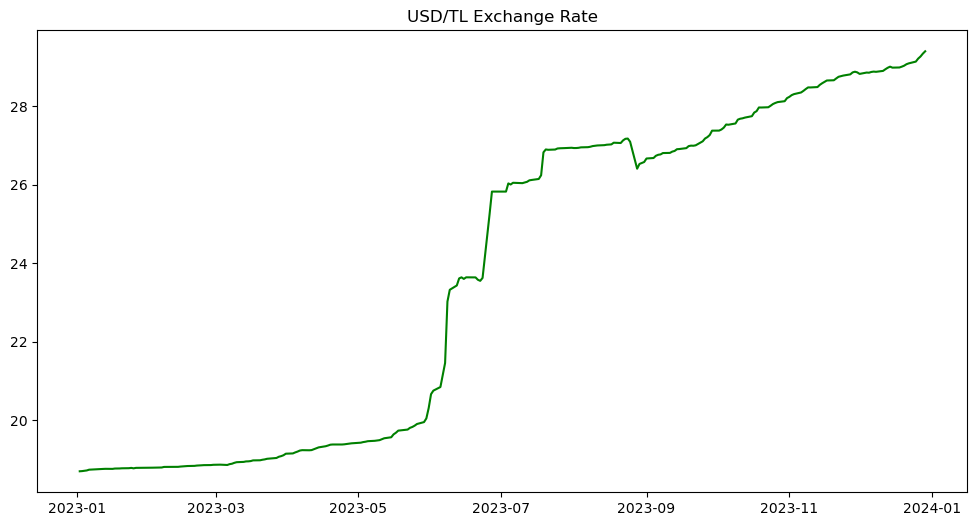

In [7]:
import evds
import pandas as pd
import matplotlib.pyplot as plt

api_key = "pXiYdnGS8o" # Make sure your key is here!
evds_api = evds.evdsAPI(api_key)

series_code = "TP.DK.USD.A.YTL"
print("Downloading...")
data = evds_api.get_data([series_code], startdate="01-01-2023", enddate="01-01-2024")
df = pd.DataFrame(data)

# --- DEBUGGING START ---
print("Raw Columns from EVDS:", df.columns)
# It is likely ['Tarih', 'TP_DK_USD_A_YTL'] (Underscores instead of dots!)
# --- DEBUGGING END ---

# SAFE FIX: Rename by position, not by name
# We know Column 0 is Date, Column 1 is the Rate
df.columns = ["Date", "USD_TL_Rate"]

# Cleanup
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["USD_TL_Rate"], color='green')
plt.title("USD/TL Exchange Rate")
plt.show()